# Image processing

[[[ 43 100 153]
  [ 45 102 155]
  [ 46 103 156]
  ...
  [ 71 119 168]
  [ 71 119 168]
  [ 72 118 168]]

 [[ 44 102 152]
  [ 45 103 153]
  [ 47 105 155]
  ...
  [ 70 120 169]
  [ 70 120 169]
  [ 71 119 168]]

 [[ 46 102 153]
  [ 47 103 154]
  [ 49 105 156]
  ...
  [ 69 123 169]
  [ 70 122 169]
  [ 70 122 169]]

 ...

 [[113  65   3]
  [134  86  22]
  [117  70   0]
  ...
  [111  55   0]
  [134  78  17]
  [129  74  10]]

 [[120  72  10]
  [142  94  30]
  [124  77   7]
  ...
  [120  64   5]
  [140  84  25]
  [111  55   0]]

 [[127  79  15]
  [148 100  34]
  [131  84  12]
  ...
  [119  63   6]
  [147  90  35]
  [100  43   0]]]


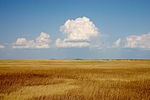

In [1]:
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
from io import BytesIO
import numpy as np

%matplotlib inline

url = "https://upload.wikimedia.org/wikipedia/commons/thumb/5/57/Cumulus_Clouds_over_Yellow_Prairie2.jpg/150px-Cumulus_Clouds_over_Yellow_Prairie2.jpg"

response = requests.get(url)
img = Image.open(BytesIO(response.content))
img.load()

print(np.asarray(img))

img

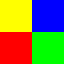

In [9]:
from PIL import Image
import numpy as np

w, h = 64, 64
data = np.zeros((h, w, 3), dtype=np.uint8)

# Yellow
for row in range(32):
    for col in range(32):
        data[row,col] = [255,255,0]
        
# Red
for row in range(32):
    for col in range(32):
        data[row+32,col] = [255,0,0]
        
# Green
for row in range(32):
    for col in range(32):
        data[row+32,col+32] = [0,255,0]        
        
# Blue
for row in range(32):
    for col in range(32):
        data[row,col+32] = [0,0,255]                
        

img = Image.fromarray(data, 'RGB')
img

Rows: 100, Cols: 150


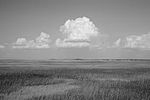

In [2]:
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
from io import BytesIO
import numpy as np



%matplotlib inline

url = "https://upload.wikimedia.org/wikipedia/commons/thumb/5/57/Cumulus_Clouds_over_Yellow_Prairie2.jpg/150px-Cumulus_Clouds_over_Yellow_Prairie2.jpg"


response = requests.get(url)
img = Image.open(BytesIO(response.content))
img.load()

img_array = np.asarray(img)
rows = img_array.shape[0]
cols = img_array.shape[1]

print("Rows: {}, Cols: {}".format(rows,cols))

# Create new image
img2_array = np.zeros((rows, cols, 3), dtype=np.uint8)
for row in range(rows):
    for col in range(cols):
        t = np.mean(img_array[row,col])
        img2_array[row,col] = [t,t,t]

img2 = Image.fromarray(img2_array, 'RGB')
img2  

https://upload.wikimedia.org/wikipedia/commons/thumb/8/87/Tundra_in_Siberia.jpg/150px-Tundra_in_Siberia.jpg


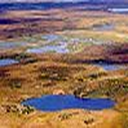

https://upload.wikimedia.org/wikipedia/commons/thumb/2/2d/Picea_glauca_taiga.jpg/150px-Picea_glauca_taiga.jpg


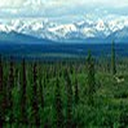

https://upload.wikimedia.org/wikipedia/commons/thumb/1/12/Grosser_Aletschgletscher_3178.JPG/150px-Grosser_Aletschgletscher_3178.JPG


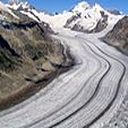

https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/040719_172_dorset_marnhull2.jpg/150px-040719_172_dorset_marnhull2.jpg


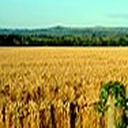

(4, 49152)


In [4]:
%matplotlib inline
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
import numpy as np
from io import BytesIO
from IPython.display import display, HTML



images = [
    "https://upload.wikimedia.org/wikipedia/commons/thumb/8/87/Tundra_in_Siberia.jpg/150px-Tundra_in_Siberia.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/thumb/2/2d/Picea_glauca_taiga.jpg/150px-Picea_glauca_taiga.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/thumb/1/12/Grosser_Aletschgletscher_3178.JPG/150px-Grosser_Aletschgletscher_3178.JPG",
    "https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/040719_172_dorset_marnhull2.jpg/150px-040719_172_dorset_marnhull2.jpg"
]

def make_square(img):
    cols,rows = img.size
    
    if rows>cols:
        pad = (rows-cols)/2
        img = img.crop((pad,0,cols,cols))
    else:
        pad = (cols-rows)/2
        img = img.crop((0,pad,rows,rows))
    
    return img
    
x = [] 
    
for url in images:
    ImageFile.LOAD_TRUNCATED_IMAGES = False
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img.load()
    img = make_square(img)
    img = img.resize((128,128), Image.ANTIALIAS)
    print(url)
    display(img)
    img_array = np.asarray(img)
    img_array = img_array.flatten()
    img_array = img_array.astype(np.float32)
    img_array = (img_array-128)/128
    x.append(img_array)
    

x = np.array(x)

print(x.shape)


In [ ]:
import tensorflow as tf
print(tf.__version__)


!pip uninstall tensorflow



!pip install tensorflow-gpu==2.0.0-alpha0